# Pipe Flow Model to Describe the relationships among $R_e$, $f$, $V$, $D$, $k_s$, and $\nu$

$$ R_e=\frac{VD}{\nu} $$

For nonlaminar range of pipe flow:

Colebrook equation:
$$ \frac{1}{\sqrt{f}}=-2.0\log_{10}\left(\frac{k_s/D}{3.7}+\frac{2.51}{R_e\sqrt{f}}\right) $$

Haaland equation:
$$ \frac{1}{\sqrt{f}}=-1.8\log_{10}\left[\left(\frac{k_s/D}{3.7}\right)^{1.11}+\frac{6.9}{R_e}\right] $$

For laminar range of pipe flow:
$$ f=\frac{64}{R_e} $$

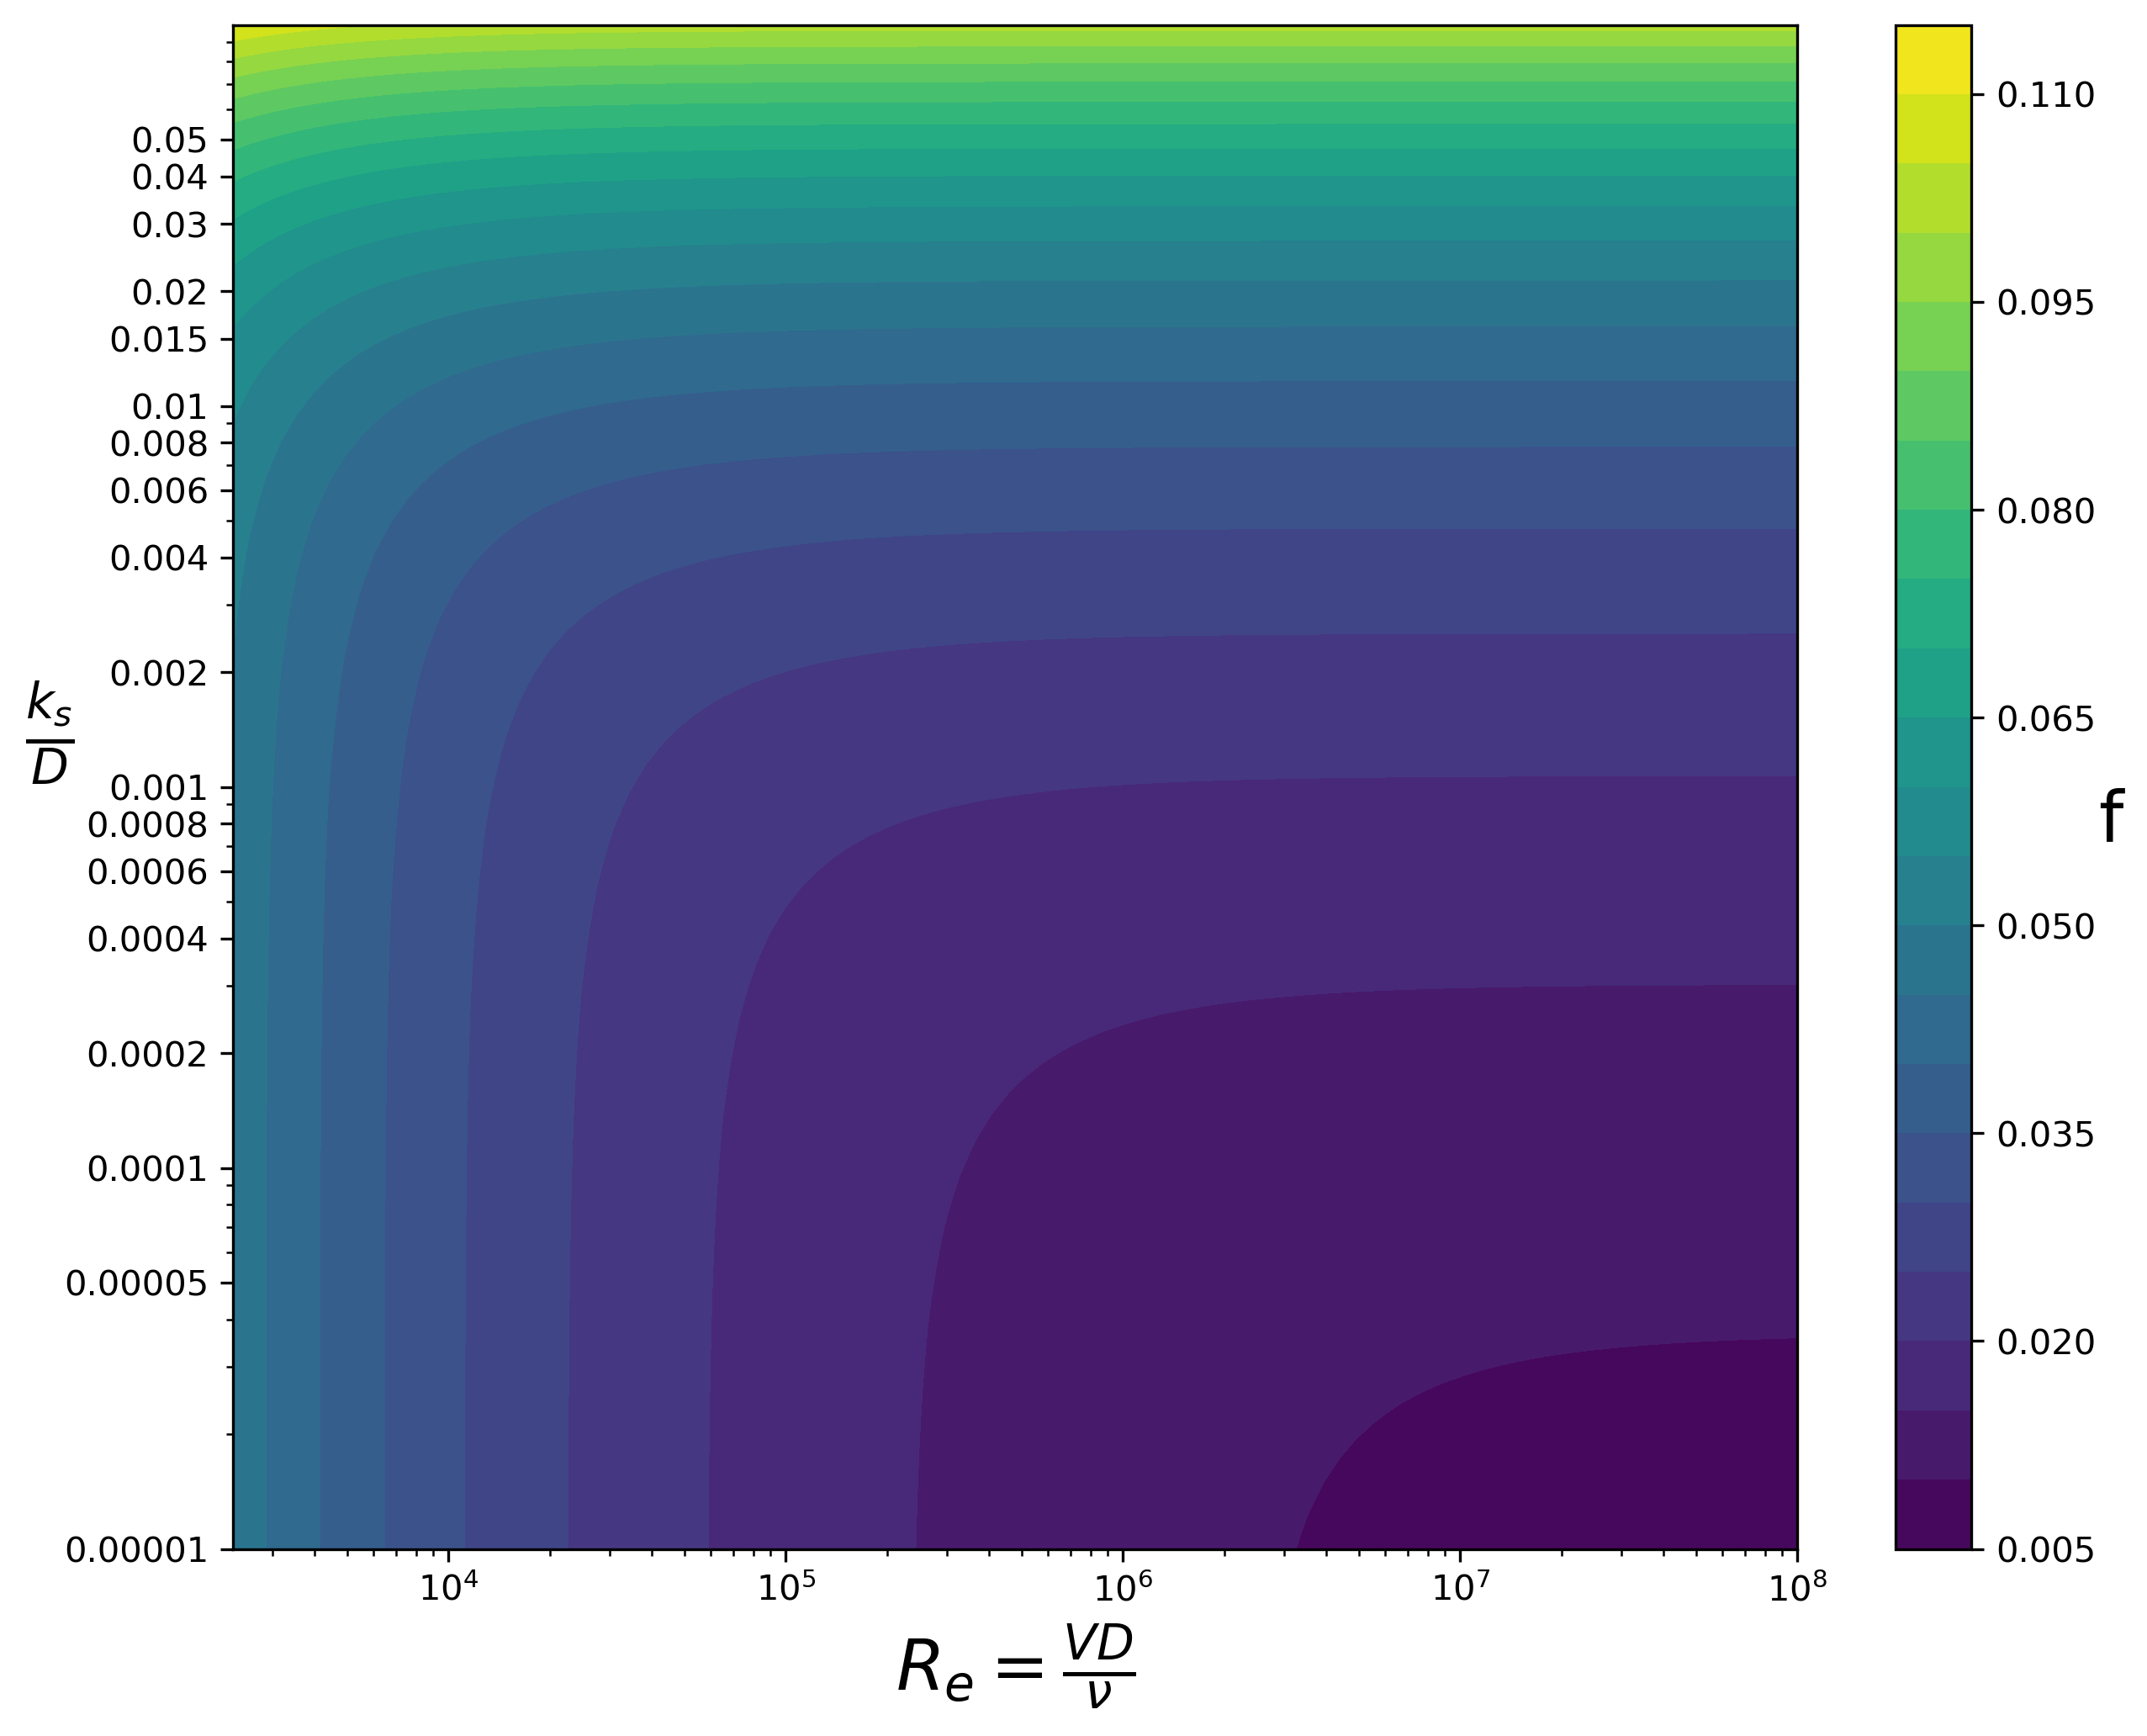

In [8]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Define Variables

# relative roughness e = ks/D
#e = np.array([0,0.00001,0.00005,0.0001,0.0002,0.0004,0.0006,0.0008,0.001,0.002,0.004,0.006,0.008,0.01,0.015,0.02,0.03,0.04,0.05])
e = np.logspace(-5,-1,100,base=10)

# friction factor f
f = np.logspace(-3,-1,100,base=10)
# Reynold number Re
re = np.logspace(np.log10(2300),8,100,base=10)

RE,E = np.meshgrid(re,e)

#use haaland equation for simplification
F = (1/(-1.8*np.log10((E/3.7)**1.11+6.9/RE)))**2

plt.figure(figsize=(10,8),dpi=300)
plt.contourf(RE,E,F, levels=20)
plt.xscale('log')
plt.xlabel(r'$R_e=\frac{VD}{\nu}$',fontsize=20)
plt.ylabel(r'$\frac{k_s}{D}$',fontsize=20,rotation=0)
plt.yscale('log')
plt.yticks([0.00001,0.00005,0.0001,0.0002,0.0004,0.0006,0.0008,0.001,0.002,0.004,0.006,0.008,0.01,0.015,0.02,0.03,0.04,0.05],['0.00001','0.00005','0.0001','0.0002','0.0004','0.0006','0.0008','0.001','0.002','0.004','0.006','0.008','0.01','0.015','0.02','0.03','0.04','0.05'])
cbar=plt.colorbar()
cbar.set_label('f',fontsize=20,rotation=0)
#cbar.set_ticks([0.008,0.009,0.010,0.015,0.020,0.025,0.030,0.040,0.050,0.060,0.070,0.080,0.090,0.100])
#cbar.set_ticklabels(['0.008','0.009','0.010','0.015','0.020','0.025','0.030','0.040','0.050','0.060','0.070','0.080','0.090','0.100'])

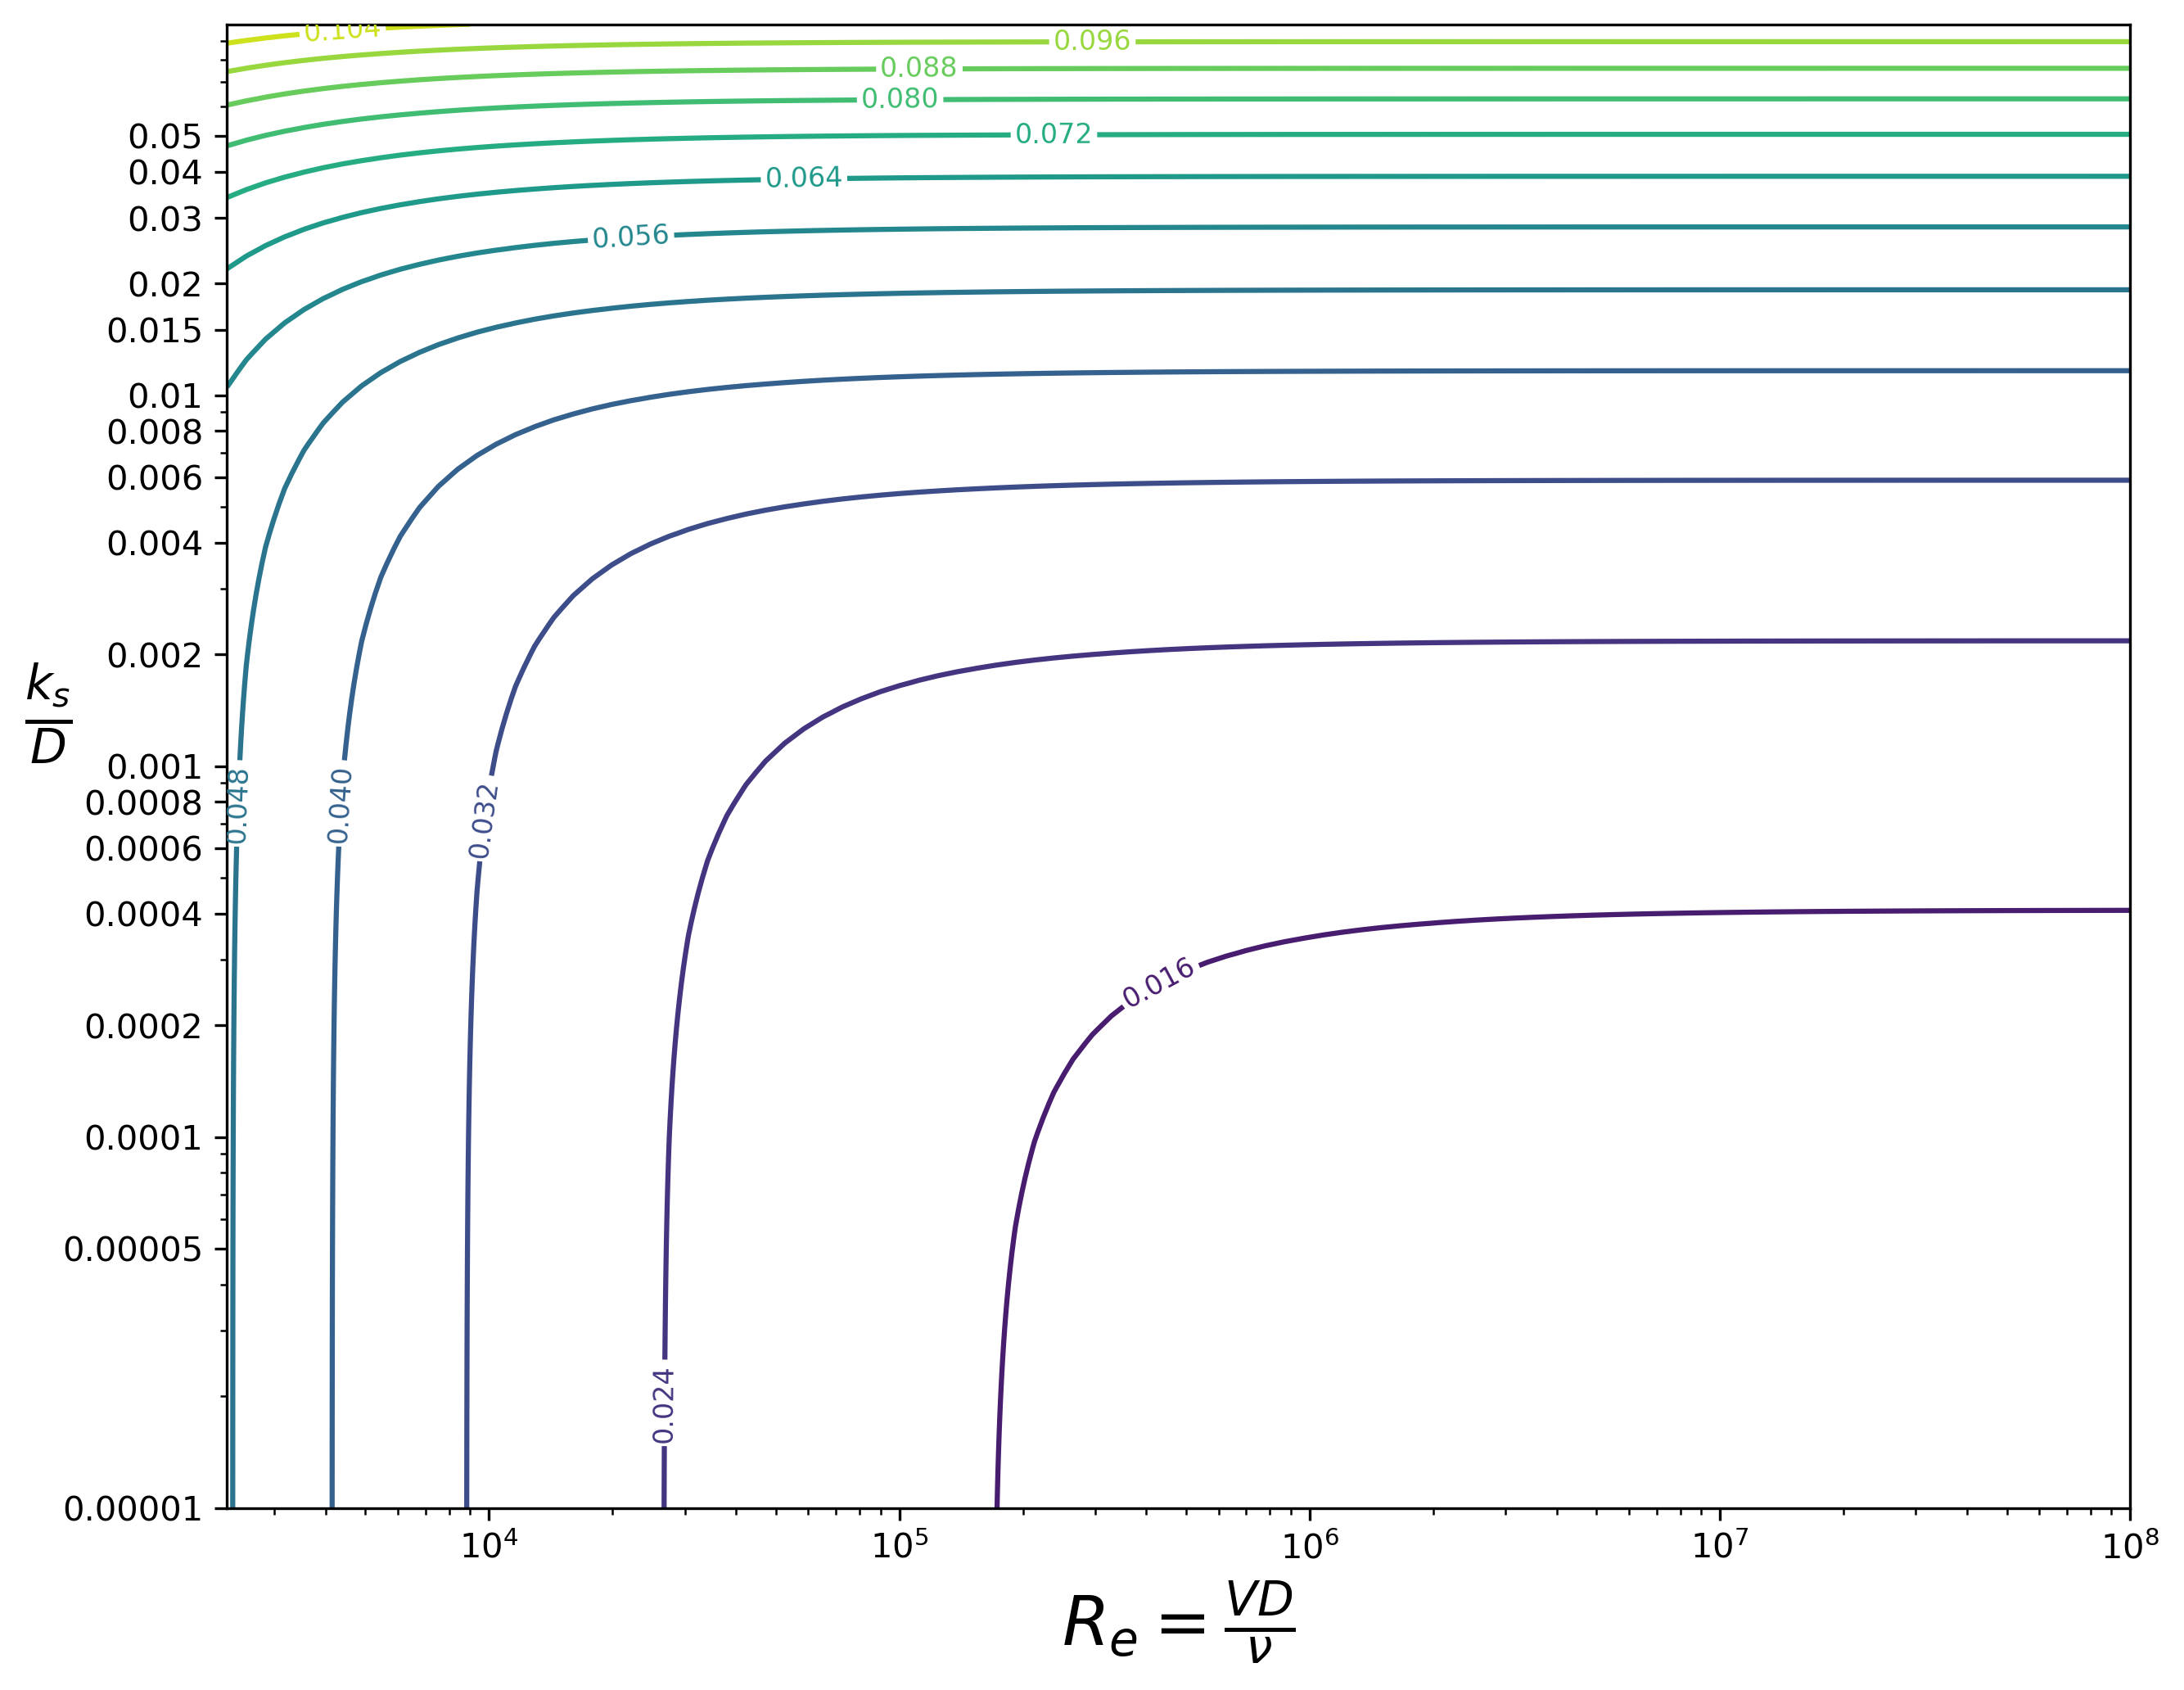

In [2]:
plt.figure(figsize=(10,8),dpi=300)
cs = plt.contour(RE,E,F, levels=14)
plt.xscale('log')
plt.xlabel(r'$R_e=\frac{VD}{\nu}$',fontsize=20)
plt.ylabel(r'$\frac{k_s}{D}$',fontsize=20,rotation=0)
plt.yscale('log')
plt.yticks([0.00001,0.00005,0.0001,0.0002,0.0004,0.0006,0.0008,0.001,0.002,0.004,0.006,0.008,0.01,0.015,0.02,0.03,0.04,0.05],['0.00001','0.00005','0.0001','0.0002','0.0004','0.0006','0.0008','0.001','0.002','0.004','0.006','0.008','0.01','0.015','0.02','0.03','0.04','0.05'])
plt.clabel(cs,fontsize=8)
plt.show()

# Practice Problem #1: Generate your own Moody Chart

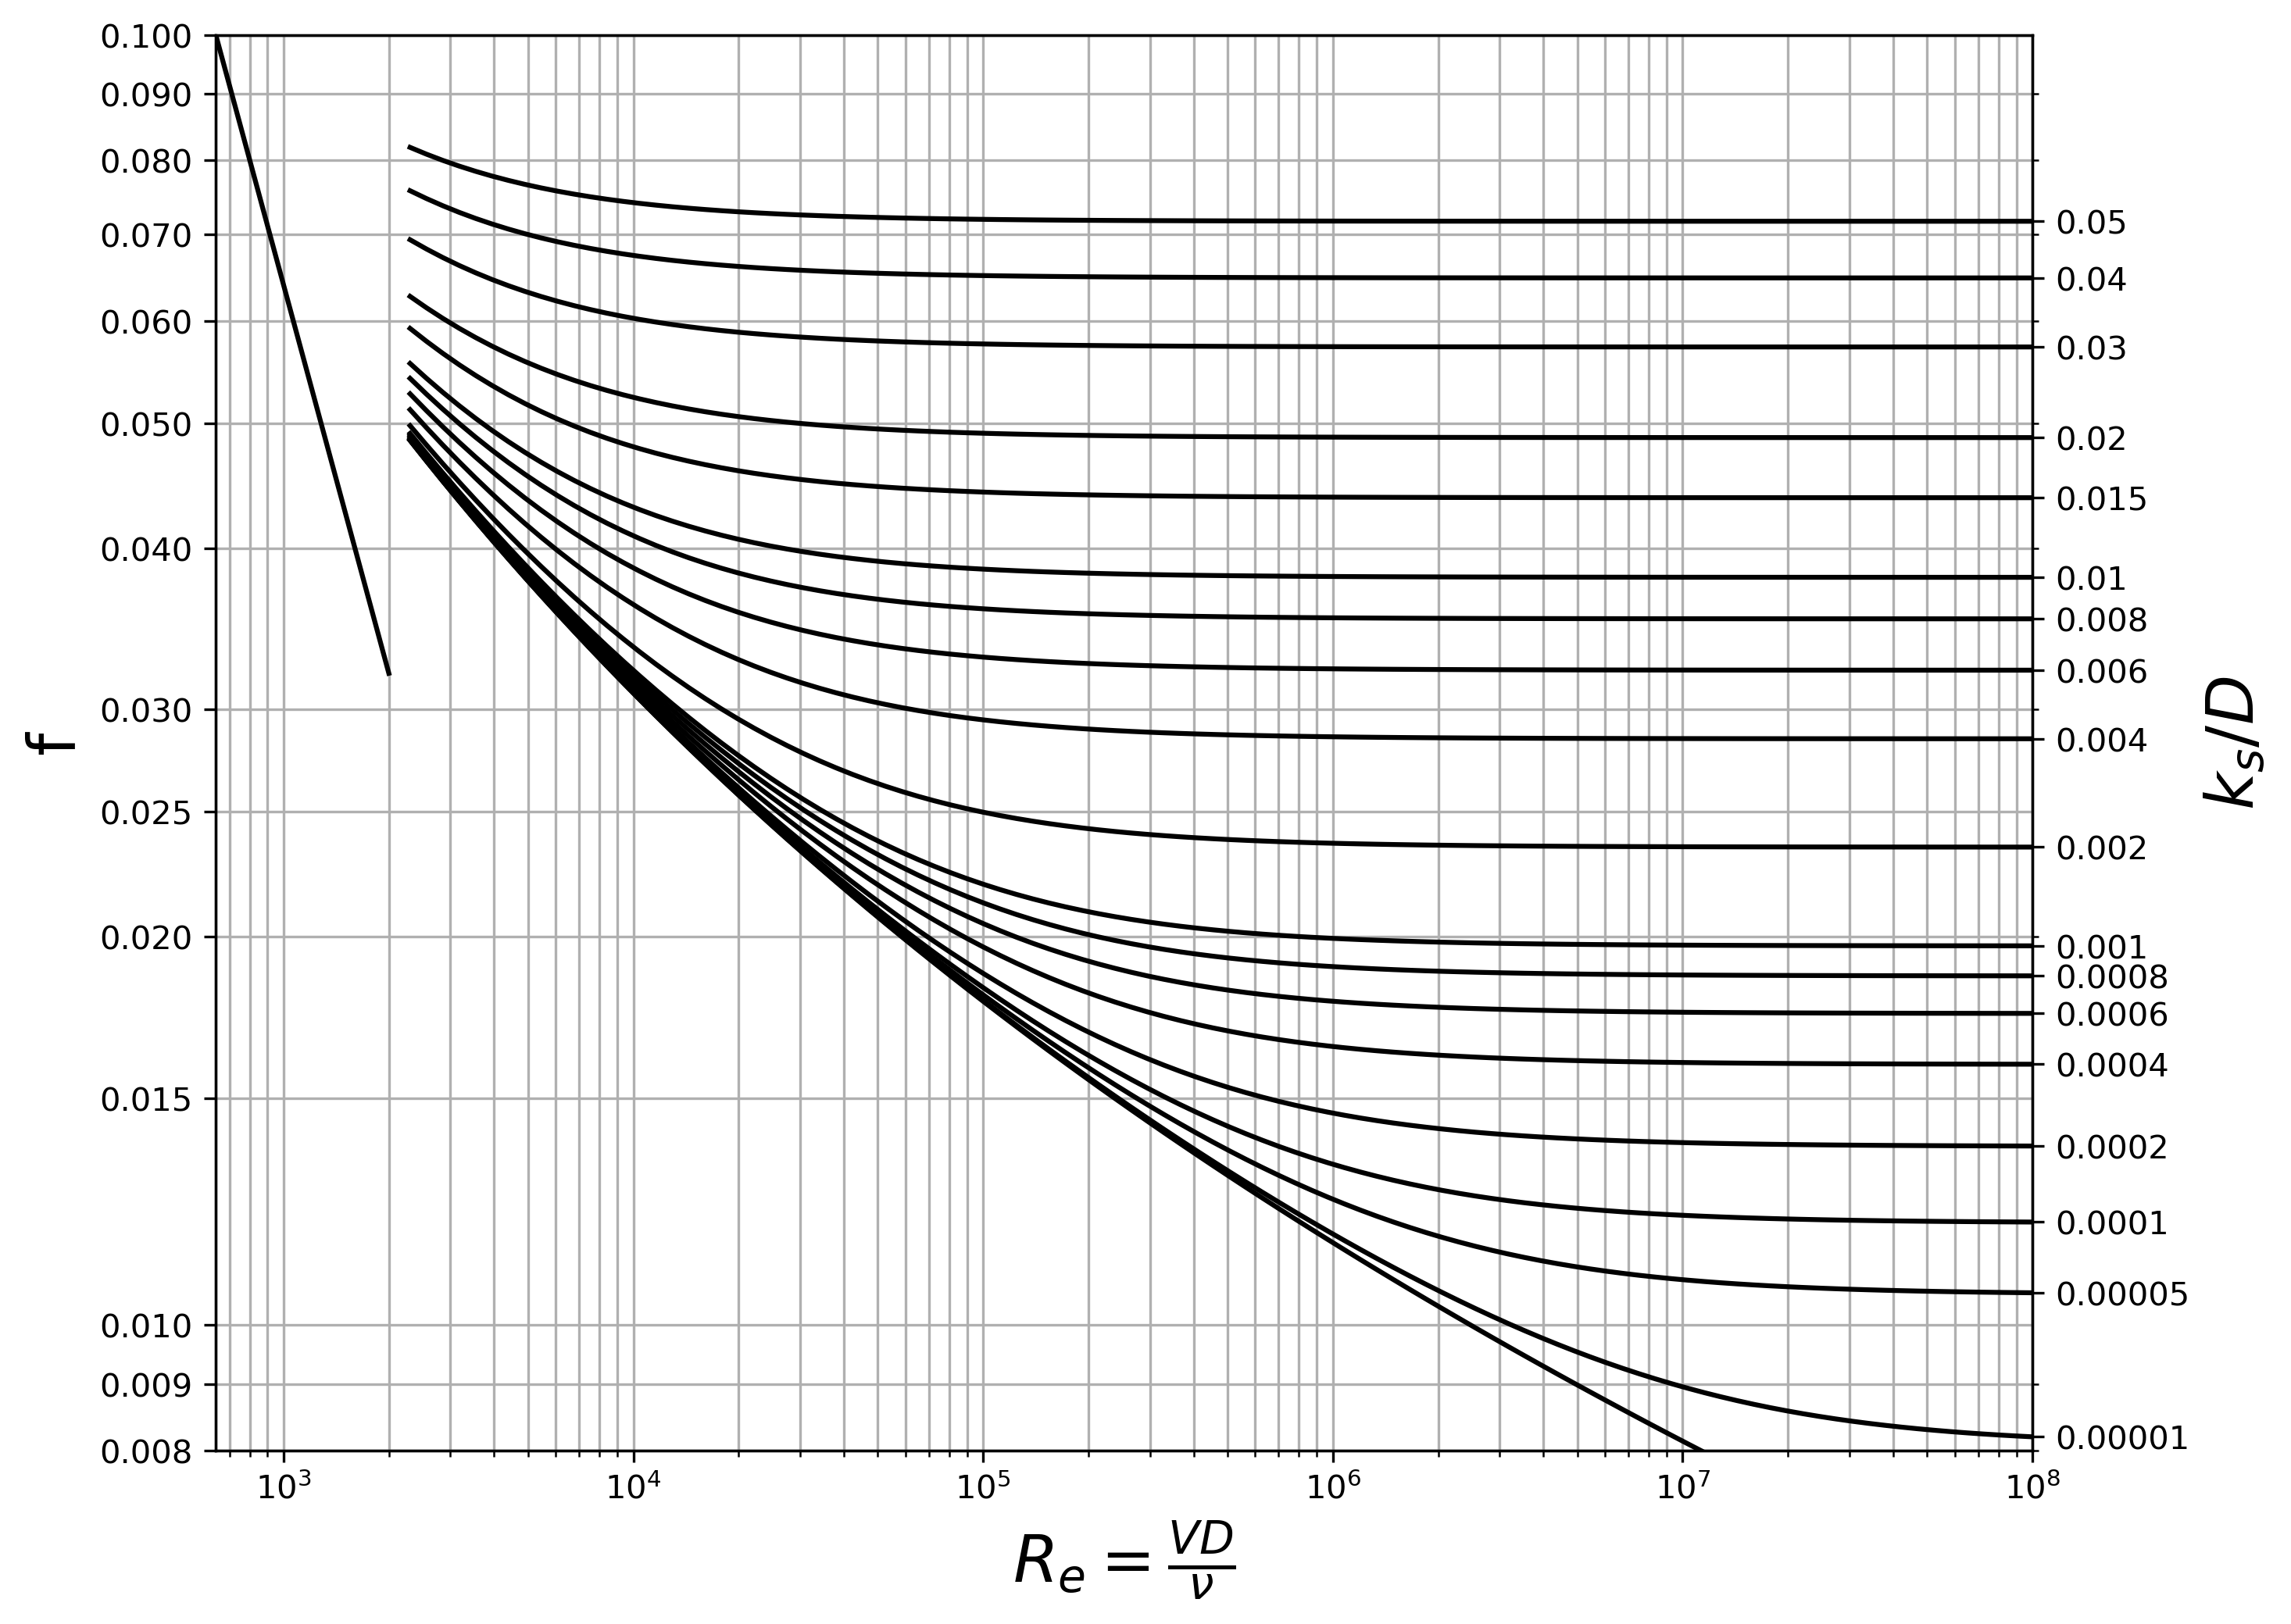

## 3D Surface Plot

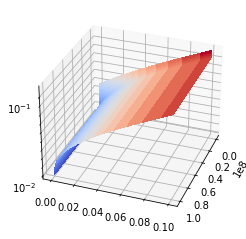

In [21]:
fig, ax = plt.subplots(subplot_kw={"projection":"3d"})
ax.plot_surface(RE,E,F, cmap='coolwarm', lw=0, antialiased=False)
#ax.xaxis._set_scale('log')
#ax.yaxis._set_scale('log')
ax.zaxis._set_scale('log') # on OSX: Notice there is an underscore in front of 'set'
ax.view_init(elev=30, azim=20)


## Animation

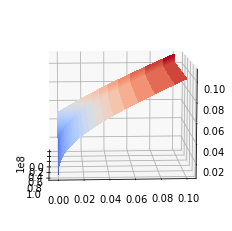

In [13]:
from matplotlib import animation
from matplotlib.animation import PillowWriter

fig, ax = plt.subplots(subplot_kw={"projection":"3d"})
ax.plot_surface(RE,E,F, cmap='coolwarm', lw=0, antialiased=False)
ax.view_init(elev=30, azim=50)

def animate(i):
    ax.view_init(elev=10, azim=3*i)
    
ani = animation.FuncAnimation(fig, animate, frames=120, interval=50)
ani.save('images/ani.gif',writer='pillow',fps=30,dpi=100)

# Practice Problem #2: Using Colebrook equation to find f values numerically and Compare the results with Haaland equation


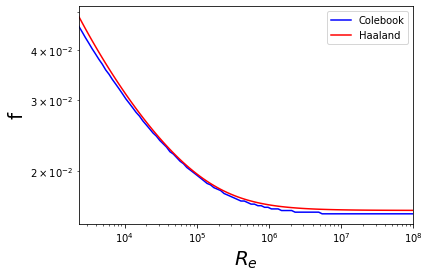